<a href="https://colab.research.google.com/github/ttjh1234/Study_MLDL/blob/main/chapter02_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#생선 분류 문제

##데이터 전처리

###Numpy를 활용하여 데이터 전처리

chapter1에서 사용한 Kaggle 생선 데이터 이어서 사용.

Numpy의 함수를 사용하여 데이터 준비

**np.column_stack()**:두 리스트를 일렬로 세운 다음 연결, 매개변수는 **튜플**로 전달

**np.concatenate()**:첫 리스트 차원을 이용하여 그대로 연결, 매개밴셔는 **튜플**로 전달

**np.ones()**:1을 채운 배열을 만들어 주는 함수

**np.zeros()**:0을 채운 배열을 만들어 주는 함수


In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
fish_data=np.column_stack((fish_length,fish_weight))

In [4]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [6]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [7]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


###Sklearn으로 test_set, train_set 나누기

**Sklearn**이 제공하는 **train_test_split** 함수는 기본적으로 25%를 test_set으로 분리.

**random_state** 매개변수는 일종의 시드값을 설정하는 요소


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,random_state=42)

In [10]:
print(train_input.shape,test_input.shape,'\n')
print(train_target.shape,test_target.shape,'\n')
print(np.unique(train_target,return_counts=True))
print(np.unique(test_target,return_counts=True))

(36, 2) (13, 2) 

(36,) (13,) 

(array([0., 1.]), array([11, 25]))
(array([0., 1.]), array([ 3, 10]))


test_set과 train_set을 나눴지만 타겟 변수의 셋을 보면 

전체 데이터셋의 도미와 빙어 비율 : **2.5:1**

test_set과 train_set의 빙어 비율 : **3.3:1** ,**2.27:1**

샘플링 편향이 일어났다. 특히 일부 클래스의 개수가 적을 때 이런 현상이 생길 수 있음

이를 해결하기 위해 **stratify** 매개변수에 타깃 데이터를 지정하면 비율에 맞게 데이터를 나눔


In [11]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target,
                                                                 random_state=42)

print(np.unique(train_target,return_counts=True))
print(np.unique(test_target,return_counts=True))

(array([0., 1.]), array([10, 26]))
(array([0., 1.]), array([4, 9]))


###수상한 데이터 적용

문제에서 제시한 특성 (25, 150)을 가지는 생선(도미) 분류 문제

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
print(kn.score(test_input,test_target))

1.0


In [13]:
print(kn.predict([[25,150]]))

[0.]


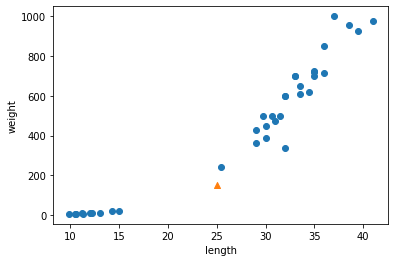

In [14]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**kn.kneighbors()**는 주어진 샘플에서 가장 가까운 이웃을 찾아주며, 거리와 인덱스를 반환

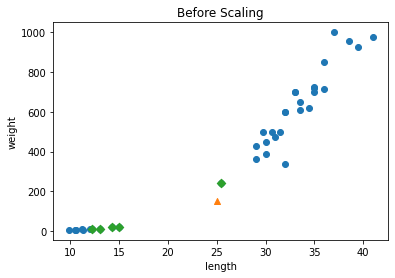

In [15]:
distances,indexes=kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Before Scaling')
plt.show()

In [16]:
print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


###Scale 처리하기

위 모델은 두 특성간 **스케일**이 다르기 때문에 적절한 모형이 아니다.

데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측하기 어렵다.

주로 **거리 기반** 알고리즘일 때 나타난다. 

따라서 제대로 사용하기 위해서는 특성값을 일정한 기준으로 맞추는 **전처리 작업**이 필요하다.

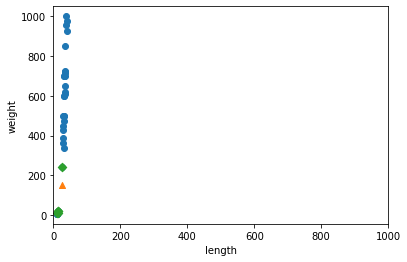

In [17]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위 산점도의 x,y축의 스케일을 같게 해서 보면, 

x축 데이터(길이)는 데이터들간의 거리에 **영향을 많이 끼치지 못하다**는 것을 알 수 있다.

따라서 **표준화**를 진행해야한다.

In [18]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)
print(mean,std)
train_scaled=(train_input-mean)/std
print(train_scaled[:5])

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


###Scale 처리한 데이터로 모델 훈련 및 평가

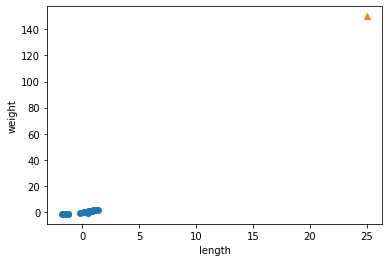

In [19]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위 산점도를 보면 train_set은 **표준화**가 진행되었으나

예측에 사용할 변수와 test_set은 **표준화**가 진행되지않았다.

동일 조건을 유지하기 위해 **train_set에서 사용한 평균과 표준편차**를 사용하여 표준화를 진행한다.

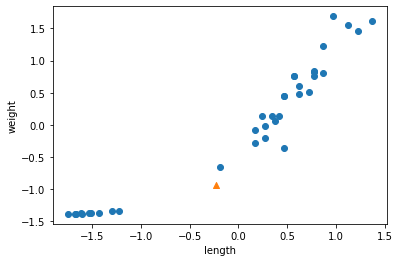

In [20]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()